In [85]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

data = np.loadtxt('data/ex2data1.txt',delimiter=',')


X = np.c_[np.ones(data.shape[0]), data[:,0:2]]
Y = np.c_[data[:,2]]


<img src="pic/exe2/sigmod.png">

In [86]:
def sigmoid(z) :
    return 1/(1+np.exp(-z))

# sigmoid(-1)

def hyposthesis(theta, X) :
    """
    向量化表示hyposthesis
    theta: 1*n
    X: m*n
    return: 1:n * n*m = 1*m(一位数组)
    """
    return 1/(1+np.exp(-(theta.dot(X.T))))
              
              
theta = np.zeros(X.shape[1])
# print theta.shape
hyposthesis(theta, X)
# sigmoid(theta.T.dot(X.T))



array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5])

Cost fun:
<img src="pic/exe2/costFun.png" width=50%>

In [87]:
def costFun(theta, X, Y) :
    """
    costFun 向量化，矩阵化表示
    theta: 1*n
    X: m*n
    Y: m*1
    """
    # h: 1*m
    m = X.shape[0]
    h = hyposthesis(theta, X)
    
    J = 1.0/m*(-(np.log(h).dot(Y)) - np.log(1-h.T).dot((1-Y)))
    return J[0]
    
# theta = np.zeros(X.shape[1])
costFun(theta, X, Y)

0.69314718055994518

Gradient :
<img src="pic/exe2/gd.png" width=50%>

In [60]:
# def grad_descent(theta, X, Y, alpha=0.01, num_iters=1000):
#     """
#     theta: n*1
#     X: m*n
#     Y: m*1
#     return n*1
#     """
#     m = X.shape[0]
#     J_history = np.zeros(num_iters)
#     for iter in np.arange(num_iters):
#         J_history[iter] = costFun(theta,X,Y)
#         H = hyposthesis(theta, X)
#         theta = theta - alpha*1.0/m*((H-Y.T).dot(X)).T
#     return (theta, J_history)
    
# grad_descent(theta, X, Y)

In [88]:
def gradient(theta, X, Y):
    """
    theta: 一维数组
    X: m*n
    Y: m*1
    return 一维数组
    """
    m = X.shape[0]
    H = hyposthesis(theta, X)
    print H.shape
    return (1.0/m*((H-Y.T).dot(X))).flatten()

# theta = np.c_[np.zeros(X.shape[1])]
# gradient(theta, X, Y)
    


In [89]:
cost = costFun(theta, X, Y)
theta1 = grad_descent(theta, X, Y)
print 'cost = '+str(cost)
print 'theta is /n',theta1

cost = 0.69314718056
theta is /n [ -0.1        -12.00921659 -11.26284221]


In [90]:
#使用minimize优化函数，不用像之前线下回归一个对梯度进行梯度下降多伦迭代，设置alpha值和迭代次数
res = minimize(costFun, theta, args=(X,Y), method=None, jac=grad_descent, options={'maxiter':400})
res


/Users/yuancailei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log


      fun: 0.20349770158944375
 hess_inv: array([[  3.31474479e+03,  -2.63892205e+01,  -2.70237122e+01],
       [ -2.63892205e+01,   2.23869433e-01,   2.02682332e-01],
       [ -2.70237122e+01,   2.02682332e-01,   2.35335117e-01]])
      jac: array([ -9.52476824e-09,  -9.31921320e-07,  -2.82608931e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [132]:
#Predict
def predict(theta, X, threshold=0.5):
    return (sigmoid(theta.dot(X.T)) >= threshold).astype('int')

print sigmoid(np.array([1, 45, 85]).dot(res.x.T))
print predict(res.x, np.array([1, 45, 85]).reshape(1,3))
p = predict(res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == Y.ravel())/p.size))

0.776290724059
[1]
Train accuracy 89%


(100, 3)


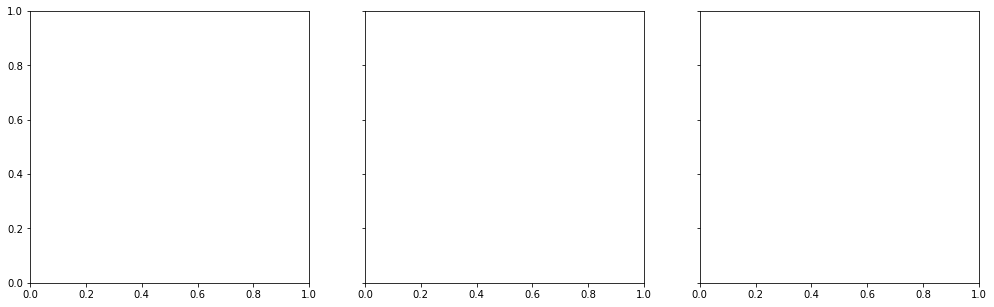

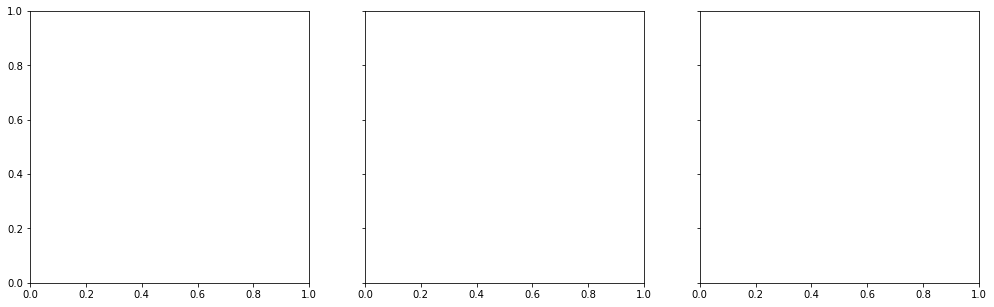

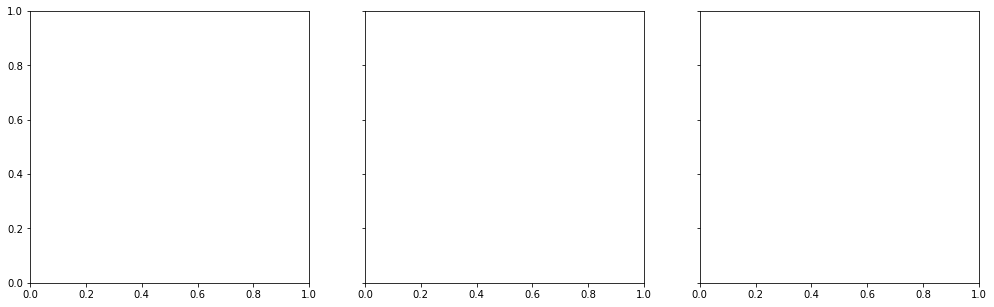

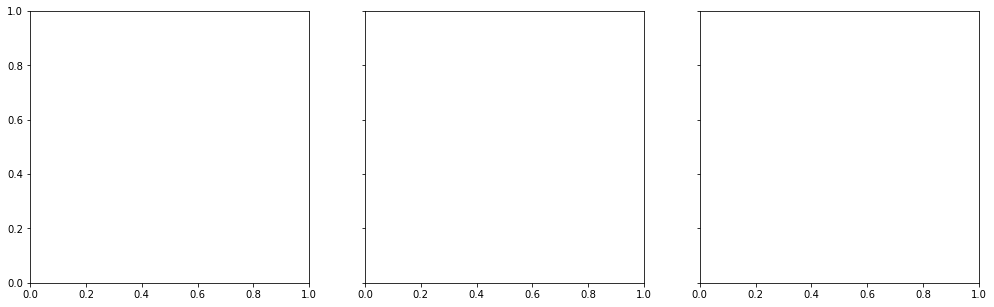

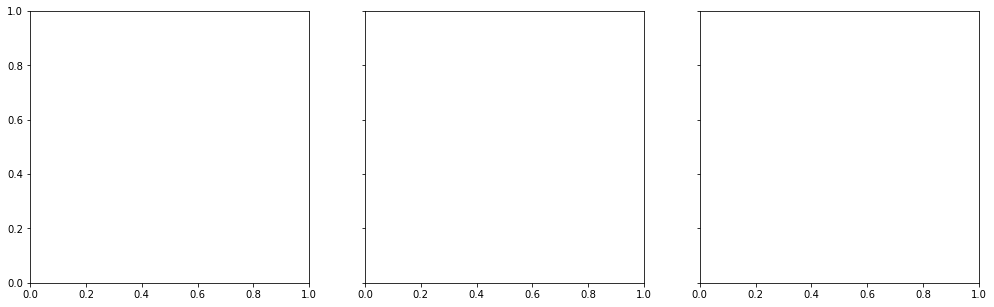

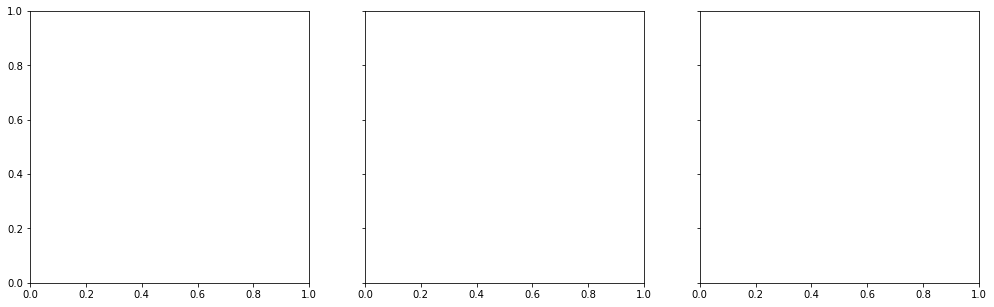

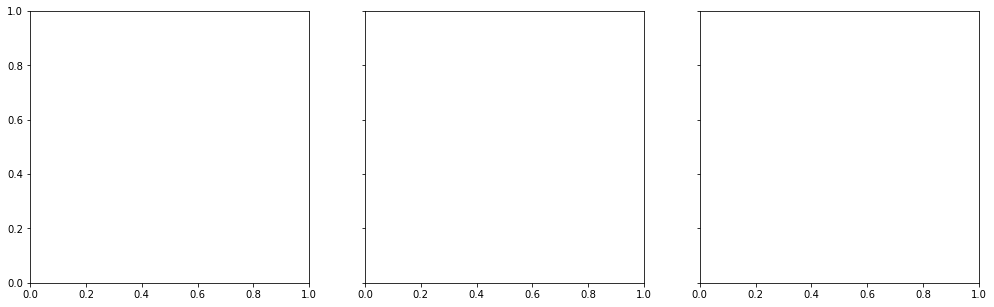

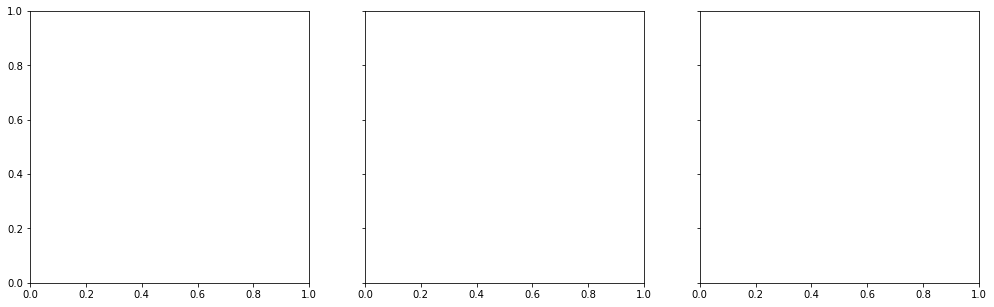

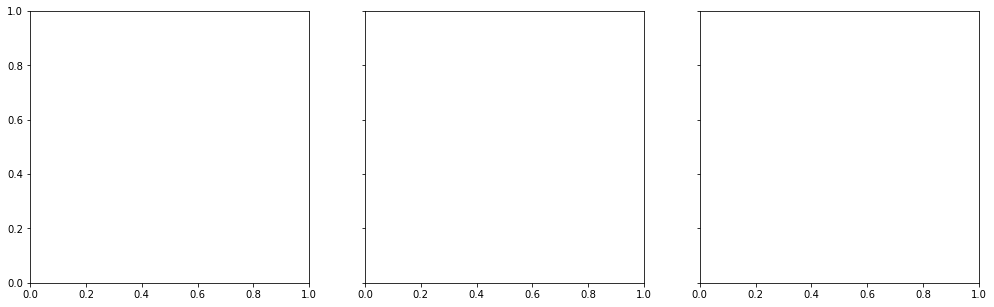

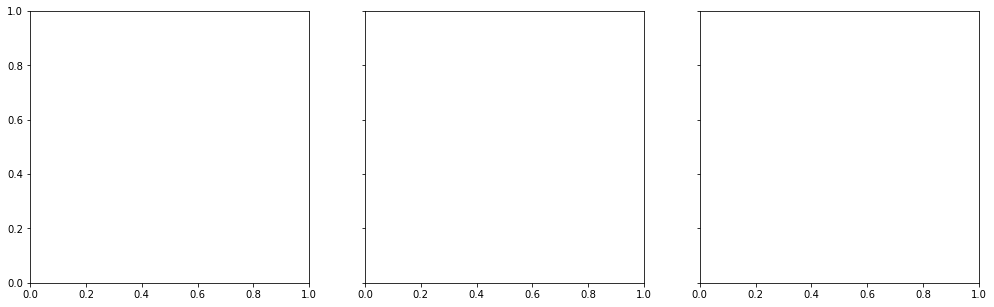

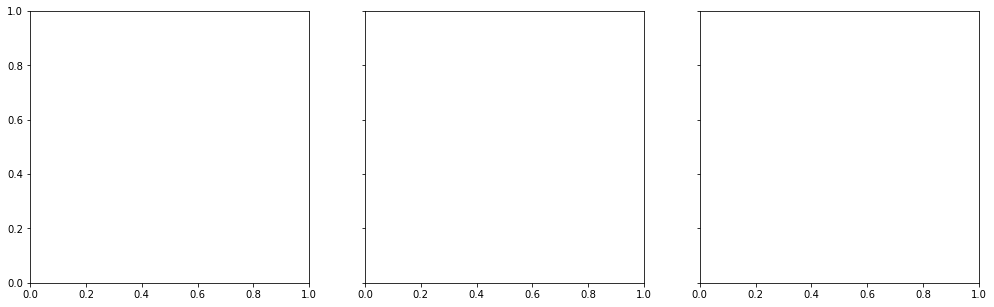

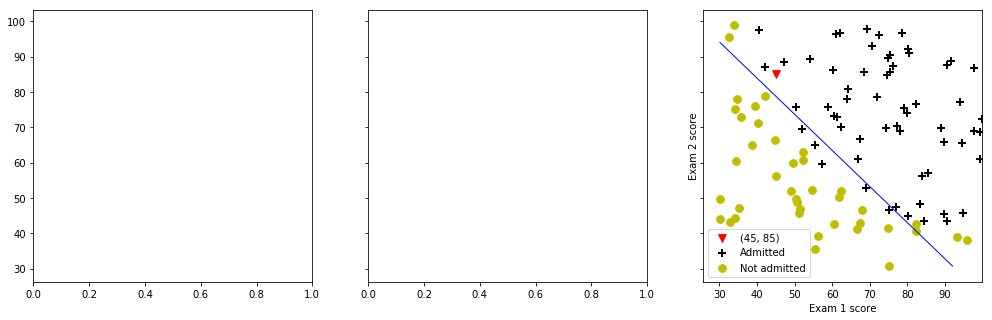

In [133]:
#Training set with decidsion bourdary
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
#     print neg
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);
    
print data.shape
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
plt.show();

如上图，看了data1数据的分布， theta0 + theta1*x1 + theta2*x2 这种线性分类可以模拟data1数据。
但是查看了data2的数据分布，就不能用简单的一次函数来模拟了。



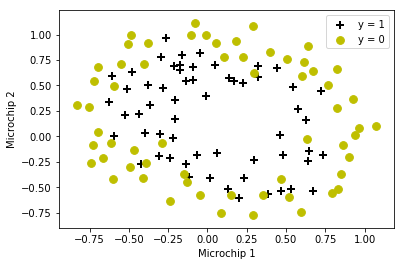

In [140]:
data2 = np.loadtxt('data/ex2data2.txt',delimiter=',')
plotData(data2, 'Microchip 1', 'Microchip 2', 'y = 1', 'y = 0')
plt.show();

In [155]:
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
YY = np.c_[data2[:,2]]
XX.shape

(118, 28)

这种情况可以有两种方式解决：

1.用x1，x2映射出更多的特征来拟合，六次多项式，这种方式就会map出很多的feature，这种方式会让逻辑回归出现更复杂的计算，并且desidsion bounary会分复杂，并且经常不会收敛
<img src="pic/exe2/mapFeature.png" width=30% height=30%>
2.下面使用正则化来处理：
正则化处理多项式过拟合的问题，在迭代过程中，它能让高阶特征的thata参数变得很小，在视频中，也可以使用L1正则化对梯度下降算法进行改进,(但为什么theta从1开始?)
<img src="pic/exe2/reg.png" width=70% height=50%>

In [158]:
def cost_fun_reg(theta, X, Y, reg) :
#     print 'in cost_fun_reg'
#     print 'theta.shape = ',theta.shape
#     print 'X.shape = ',X.shape
#     print 'Y.shape = ',Y.shape
    """
    costFun 向量化，矩阵化表示
    theta: 1*n
    X: m*n
    Y: m*1
    reg : 正则化系数
    """
    # h: 1*m
    m = X.shape[0]
    h = hyposthesis(theta, X)
    
    # the second term is regular
    J = 1.0/m*(-(np.log(h).dot(Y)) - np.log(1-h.T).dot((1-Y))) + reg/(2*m)*np.sum(np.square(theta[1:]))
    return J[0]
    
# theta = np.zeros(X.shape[1])
cost_fun_reg(theta, X, Y, 1)






0.69314718055994518

<img src="pic/exe2/gra_reg_0.png" width=40% height=40%>
<img src="pic/exe2/gra_reg_1.png" width=40% height=40%>

In [167]:
#梯度正则化
def gradient_reg(theta, X, Y, reg):
#     print 'theta.shape = ',theta.shape
#     print 'X.shape = ',X.shape
#     print 'Y.shape = ',Y.shape

    """
    注意theta0 与 theta1,2..... 分开计算
    theta: 一维数组
    X: m*n
    Y: m*1
    return 一维数组
    """
    m = X.shape[0]
    H = hyposthesis(theta, X)
    
    theta_reg = np.zeros(X.shape[1])
    theta_reg[0] = (1.0/m*((H-Y.T).dot(X[:,0]))).flatten()
#     print theta_reg[0]
    
    theta_reg[1:] = (1.0/m*((H-Y.T).dot(X[:,1:])) + reg/m*theta[1:]).flatten()
    
    return theta_reg

gradient_reg(theta, X, Y, 1)


array([ -0.1       , -12.00921659, -11.26284221])

In [168]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias
# res2 = minimize(cost_fun_reg, theta, args=(X,Y,1), method=None, jac=gradient_reg, options={'maxiter':400})
# res2

# print Y.size
# print Y.ravel()

initial_theta = np.zeros(XX.shape[1])

for i, C in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    res2 = minimize(cost_fun_reg, initial_theta, args=(XX, YY, C), method=None, jac=gradient_reg, options={'maxiter':100})
    res2
    # Accuracy
#     accuracy = 100*sum(predict(res2.x, XX) == YY.ravel())/YY.size    

#     # Scatter plot of X,y
#     plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
#     # Plot decisionboundary
#     x1_min, x1_max = X[:,0].min(), X[:,0].max(),
#     x2_min, x2_max = X[:,1].min(), X[:,1].max(),
#     xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
#     h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
#     h = h.reshape(xx1.shape)
#     axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
#     axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))